In [1]:
import pandas as pd

df = pd.read_csv("../data/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

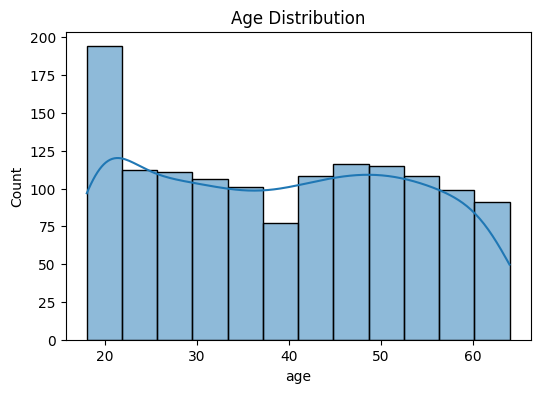

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


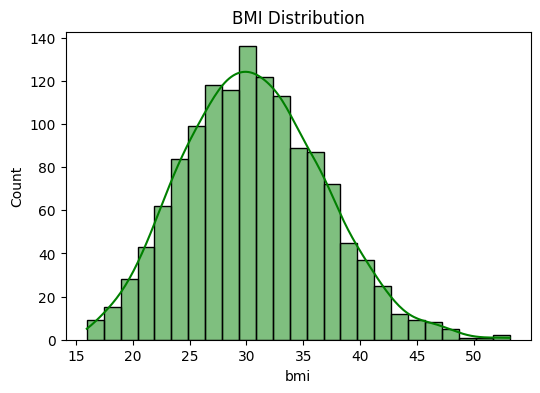

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True, color="green")
plt.title("BMI Distribution")
plt.show()


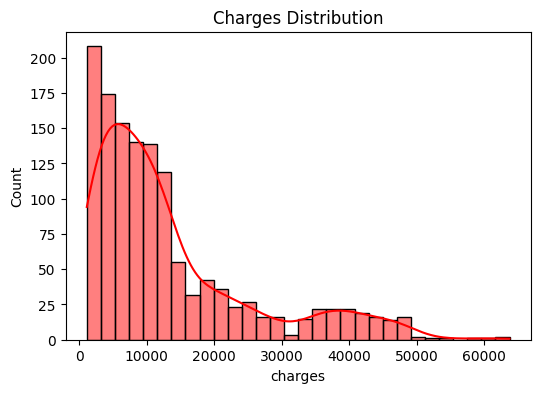

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True, color="red")
plt.title("Charges Distribution")
plt.show()


In [8]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [9]:
df['smoker'].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

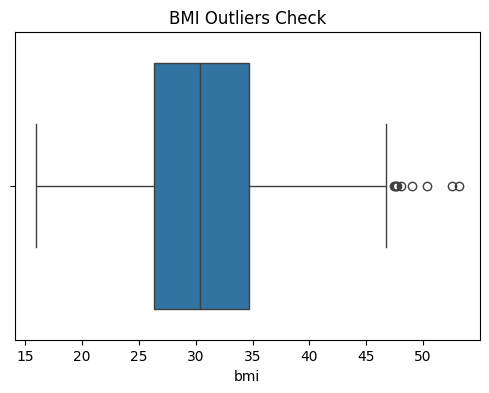

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['bmi'])
plt.title("BMI Outliers Check")
plt.show()


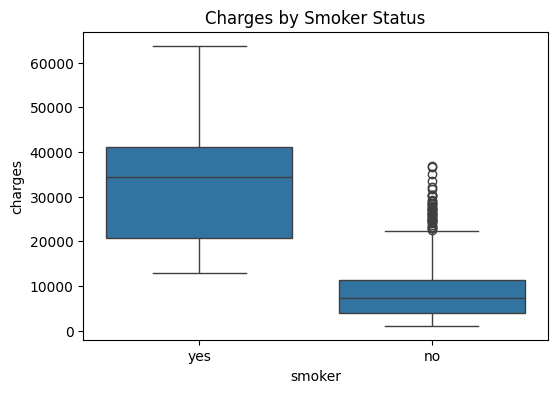

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()


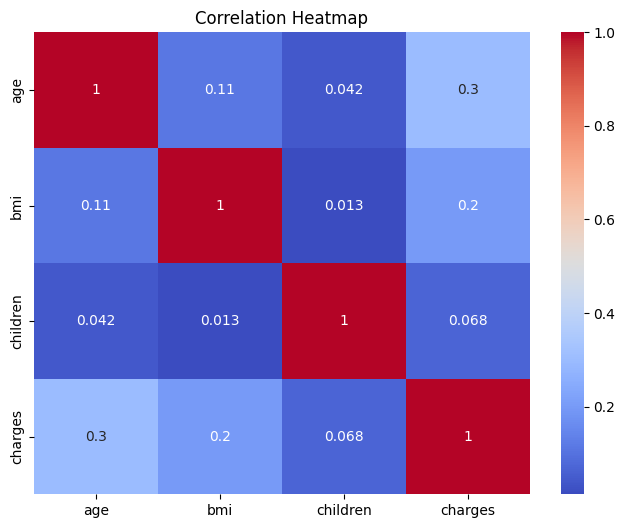

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [14]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [15]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
preprocessor.fit(X_train)


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [25]:
from sklearn.pipeline import Pipeline


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 4181.194473753649
RMSE: 5796.2846592762735
R2 Score: 0.7835929767120723


In [27]:
from sklearn.linear_model import Ridge

ridge = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression Results:
MAE: 4193.195352935269
RMSE: 5800.464937731764
R2 Score: 0.7832807188145148


In [28]:
from sklearn.linear_model import Lasso

lasso = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso(alpha=0.001))
])

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R2 Score:", r2_score(y_test, y_pred_lasso))



Lasso Regression Results:
MAE: 4181.195498065726
RMSE: 5796.285412268883
R2 Score: 0.7835929204853997


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
MAE: 2553.60906639433
RMSE: 4587.882507886067
R2 Score: 0.8644197237303527


In [31]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))



XGBoost Results:
MAE: 2576.1167309435523
RMSE: 4545.83997222062
R2 Score: 0.8668932051523154


| Model                 | MAE      | RMSE     | R²        | Notes             |
| --------------------- | -------- | -------- | --------- | ----------------- |
| **Linear Regression** | 4181     | 5796     | **0.78**  | Good baseline     |
| **Ridge**             | 4193     | 5800     | **0.78**  | Similar to Linear |
| **Lasso**             | 4181     | 5796     | **0.78**  | Same as Linear    |
| **Random Forest**     | **2553** | 4587     | **0.864** | Very strong       |
| **XGBoost**           | **2576** | **4545** | **0.867** | BEST MODEL        |


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

rf_gs = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

grid_rf = GridSearchCV(
    rf_gs,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
print("Best RF Score:", -grid_rf.best_score_)


Best RF params: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 500}
Best RF Score: 4649.807231300325


In [34]:
from xgboost import XGBRegressor

param_grid_xgb = {
    "model__n_estimators": [300, 500, 700],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 4, 5],
    "model__subsample": [0.7, 0.8, 1],
    "model__colsample_bytree": [0.7, 0.8, 1]
}

xgb_gs = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(random_state=42))
])

grid_xgb = GridSearchCV(
    xgb_gs,
    param_grid_xgb,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB Score:", -grid_xgb.best_score_)


Best XGB Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 1}
Best XGB Score: 4723.801537707489


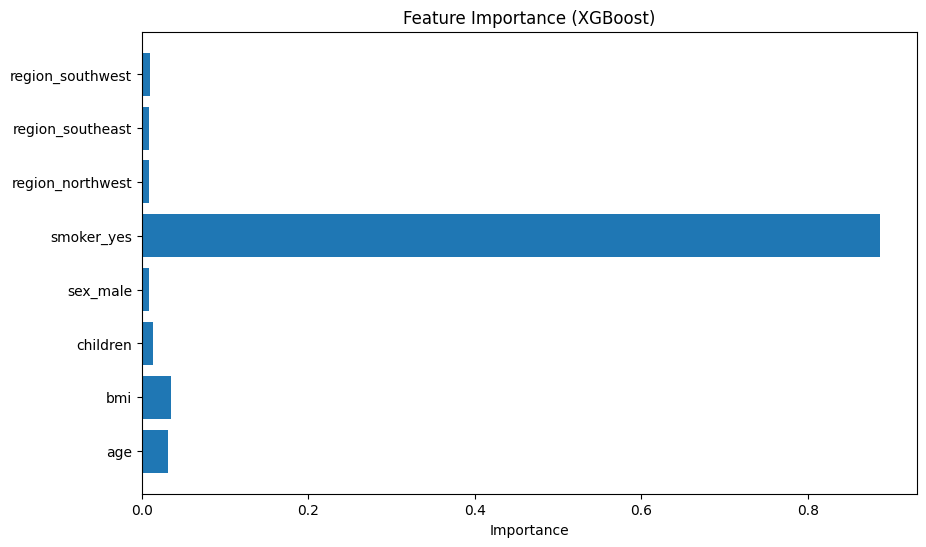

In [35]:
# Extract trained model inside pipeline
best_xgb = xgb_model.named_steps["model"]

# Get feature names
onehot_features = list(xgb_model.named_steps["preprocessor"]
                       .transformers_[1][1]
                       .get_feature_names_out(categorical_features))

numeric_features_list = numeric_features
all_features = numeric_features_list + onehot_features

# Plot feature importance
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.barh(all_features, best_xgb.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance (XGBoost)")
plt.show()


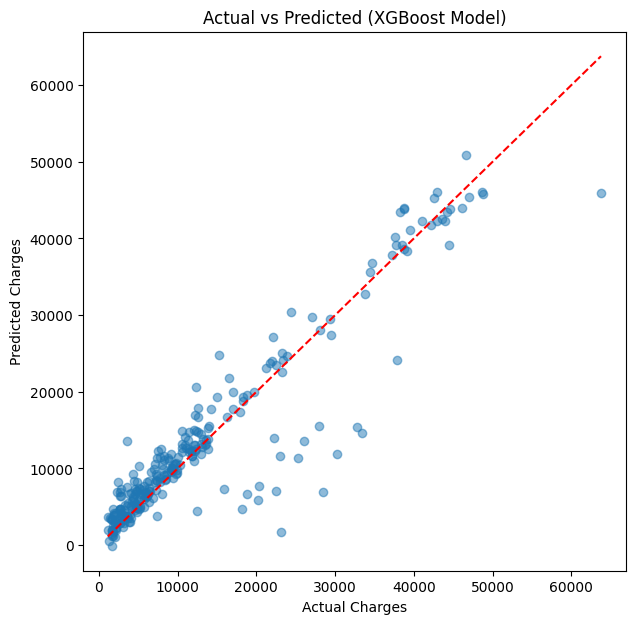

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted (XGBoost Model)")
plt.show()


In [37]:
import joblib

joblib.dump(xgb_model, "insurance_xgb_model.pkl")


['insurance_xgb_model.pkl']

In [38]:
loaded_model = joblib.load("insurance_xgb_model.pkl")

sample_pred = loaded_model.predict(X_test[:5])
sample_pred


array([11843.446 ,  6367.3677, 29545.24  , 10070.971 , 32758.684 ],
      dtype=float32)